# Training a linear regression model with gradient decent
This example is from Chapter 9, but I have changed the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create data

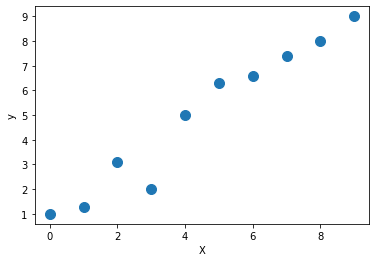

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Create a linear regression class

In [3]:
class LinearRegressionGD:
    
    def __init__(self, eta=0.0001, n_iter=500, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (output - y)
            self.w_ = self.w_ - self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ = self.b_ - self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)
    

In [4]:
# Create one class instance
lr = LinearRegressionGD(eta=0.0001)
lr.fit(X_train, y_train)


## Plott the solution

In [5]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

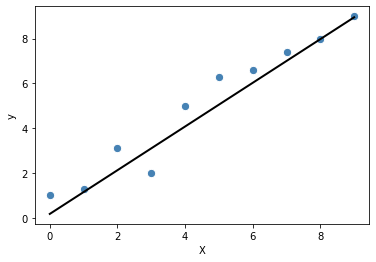

In [6]:
lin_regplot(X_train, y_train, lr)
plt.xlabel('X')
plt.ylabel('y')
plt.show()